In [1]:
import numpy as np
import pandas as pd
from openpyxl import Workbook

class Random:
    def __init__(self, seed=None):
        self.rng = np.random.default_rng(seed)
        
    def normal(self, mean, stddev):
        return self.rng.normal(mean, stddev)

def generate_demand(periods=15):
    D = []
    b = 90
    c = 0.3 * b
    e = Random()  # No seed for practice mode
    while True:
        a = e.normal(b, c)
        if a > 0:
            break
    b = a
    D.append(a)
    c = min(30, 0.3 * b)
    for _ in range(1, periods):
        while True:
            a = e.normal(b, c)
            if a > 0:
                break
        D.append(a)
    return D

def calc_demand(D, week, multiplier):
    return D[week] * multiplier

def simulate_player_strategy(periods=15):
    # Historical average sales per week
    average_sales = {
        60: 73.53,
        54: 98.78,
        48: 119.10,
        36: 181.37
    }

    D = generate_demand(periods)
    mult = [1, 1.3, 1.75, 2.8]
    prices = [60, 54, 48, 36]
    current_price_index = 0
    I = 2000
    revenue = 0
    sales = []

    for week in range(periods):
        current_price = prices[current_price_index]
        current_multiplier = mult[current_price_index]
        weekly_demand = calc_demand(D, week, current_multiplier)
        actual_sales = min(weekly_demand, I)
        revenue += current_price * actual_sales
        I -= actual_sales
        sales.append(actual_sales)

        # Check if sales are below the historical average for the current price level
        if week >= 1 and actual_sales < average_sales[current_price]:
            # Move to the next price level if it's below average sales
            current_price_index = min(current_price_index + 1, len(prices) - 1)

        # Uncomment to print out the weekly details for debugging
        # print(f"Week {week + 1}: Price = ${current_price}, Sales = {actual_sales}, Inventory = {I}, Revenue = {revenue}")

        if I <= 0:
            break

    return revenue, D

def calcRev(D, a, b, c, periods, mult, salvage=0):
    e = 0
    d = 2000
    for f in range(a):
        g = min(D[f] * mult[0], d)
        d -= g
        e += 60 * g
    for f in range(a, a + b):
        g = min(D[f] * mult[1], d)
        d -= g
        e += 54 * g
    for f in range(a + b, a + b + c):
        g = min(D[f] * mult[2], d)
        d -= g
        e += 48 * g
    for f in range(a + b + c, periods):
        g = min(D[f] * mult[3], d)
        d -= g
        e += 36 * g
    return e + d * salvage

def perfect_foresight(D, periods, mult):
    e = 0
    for a in range(1, periods + 1):
        for b in range(0, periods - a + 1):
            for c in range(0, periods - a - b + 1):
                d = calcRev(D, a, b, c, periods, mult)
                if d > e:
                    e = d
    return e

def play_game_n_times(n):
    results = []
    mult = [1, 1.3, 1.75, 2.8]

    for i in range(n):
        player_revenue, D = simulate_player_strategy()
        perfect_revenue = perfect_foresight(D, 15, mult)
        difference = perfect_revenue - player_revenue
        difference_percentage = difference / perfect_revenue * 100

        results.append({
            'Attempt': i + 1,
            'Player Revenue': player_revenue,
            'Perfect Revenue': perfect_revenue,
            'Difference': difference,
            'Difference Percentage': difference_percentage
        })

    return results

def save_results_to_excel(results, filename='game_results.xlsx'):
    df = pd.DataFrame(results)
    df.to_excel(filename, index=False)

# Run the simulation n times and save the results
n = 10000  # Number of attempts
results = play_game_n_times(n)
save_results_to_excel(results)

print(f"Results saved to 'game_results.xlsx'")

Results saved to 'game_results.xlsx'


In [11]:
import pandas as pd

# Convert the list of dictionaries to a DataFrame
df_result = pd.DataFrame(results)

# Print the DataFrame to check its content
print("DataFrame content:")
df_result

DataFrame content:


,Attempt,Player Revenue,Perfect Revenue,Difference,Difference Percentage
0,1,55331.225360,59091.896363,3760.671003,6.364106
1,2,49261.381305,52755.792393,3494.411088,6.623749
2,3,94330.722081,101622.647161,7291.925081,7.175492
3,4,79745.656298,84252.831113,4507.174815,5.349583
4,5,77086.538773,88955.040332,11868.501559,13.342135
...,...,...,...,...,...
9995,9996,99188.700793,107978.775646,8790.074853,8.140558
9996,9997,105807.351453,110104.922712,4297.571259,3.903160
9997,9998,109724.319663,114260.435625,4536.115962,3.969980
9998,9999,113351.538057,115473.692455,2122.154398,1.837782


In [12]:
# Check data types of the columns
print("\nData types of columns:")
df_result.dtypes


Data types of columns:


Attempt                    int64
Player Revenue           float64
Perfect Revenue          float64
Difference               float64
Difference Percentage    float64
dtype: object

In [13]:
# Call the describe method
description = df_result.describe()
print("\nDescribe output:")
description


Describe output:


,Attempt,Player Revenue,Perfect Revenue,Difference,Difference Percentage
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,92154.690044,98763.546997,6608.856953,6.798217
std,2886.89568,17367.603855,16839.230299,5026.854878,4.903602
min,1.00000,2190.096111,2327.220565,0.000000,0.000000
25%,2500.75000,81189.920942,90491.758429,2838.256005,3.130172
50%,5000.50000,92110.819822,101846.872135,5443.709267,5.957480
75%,7500.25000,104941.738237,110556.306542,9675.270276,9.695445
max,10000.00000,120000.000000,120000.000000,29647.355307,26.677303


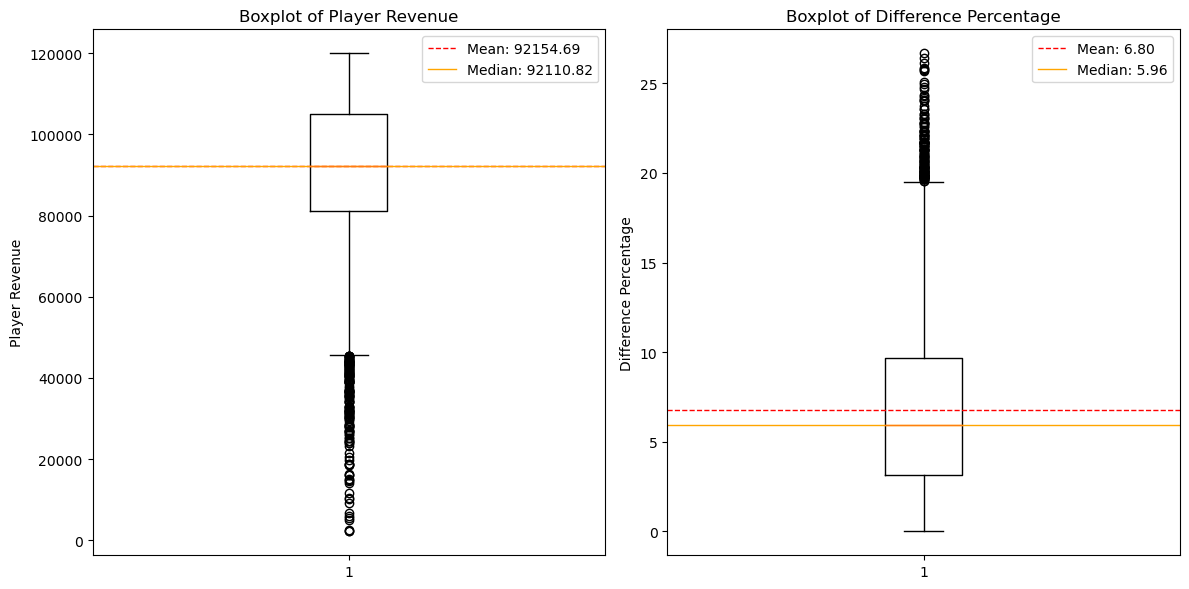

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot boxplots for 'Player Revenue' and 'Difference Percentage'
plt.figure(figsize=(12, 6))

# Boxplot for 'Player Revenue'
plt.subplot(1, 2, 1)
plt.boxplot(df_result['Player Revenue'])
plt.title('Boxplot of Player Revenue')
plt.ylabel('Player Revenue')

# Calculate mean and median for 'Player Revenue'
mean_player_revenue = df_result['Player Revenue'].mean()
median_player_revenue = df_result['Player Revenue'].median()

# Add mean and median lines to the boxplot
plt.axhline(mean_player_revenue, color='r', linestyle='--', linewidth=1, label=f'Mean: {mean_player_revenue:.2f}')
plt.axhline(median_player_revenue, color='orange', linestyle='-', linewidth=1, label=f'Median: {median_player_revenue:.2f}')
plt.legend()

# Boxplot for 'Difference Percentage'
plt.subplot(1, 2, 2)
plt.boxplot(df_result['Difference Percentage'])
plt.title('Boxplot of Difference Percentage')
plt.ylabel('Difference Percentage')

# Calculate mean and median for 'Difference Percentage'
mean_diff_percentage = df_result['Difference Percentage'].mean()
median_diff_percentage = df_result['Difference Percentage'].median()

# Add mean and median lines to the boxplot
plt.axhline(mean_diff_percentage, color='r', linestyle='--', linewidth=1, label=f'Mean: {mean_diff_percentage:.2f}')
plt.axhline(median_diff_percentage, color='orange', linestyle='-', linewidth=1, label=f'Median: {median_diff_percentage:.2f}')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

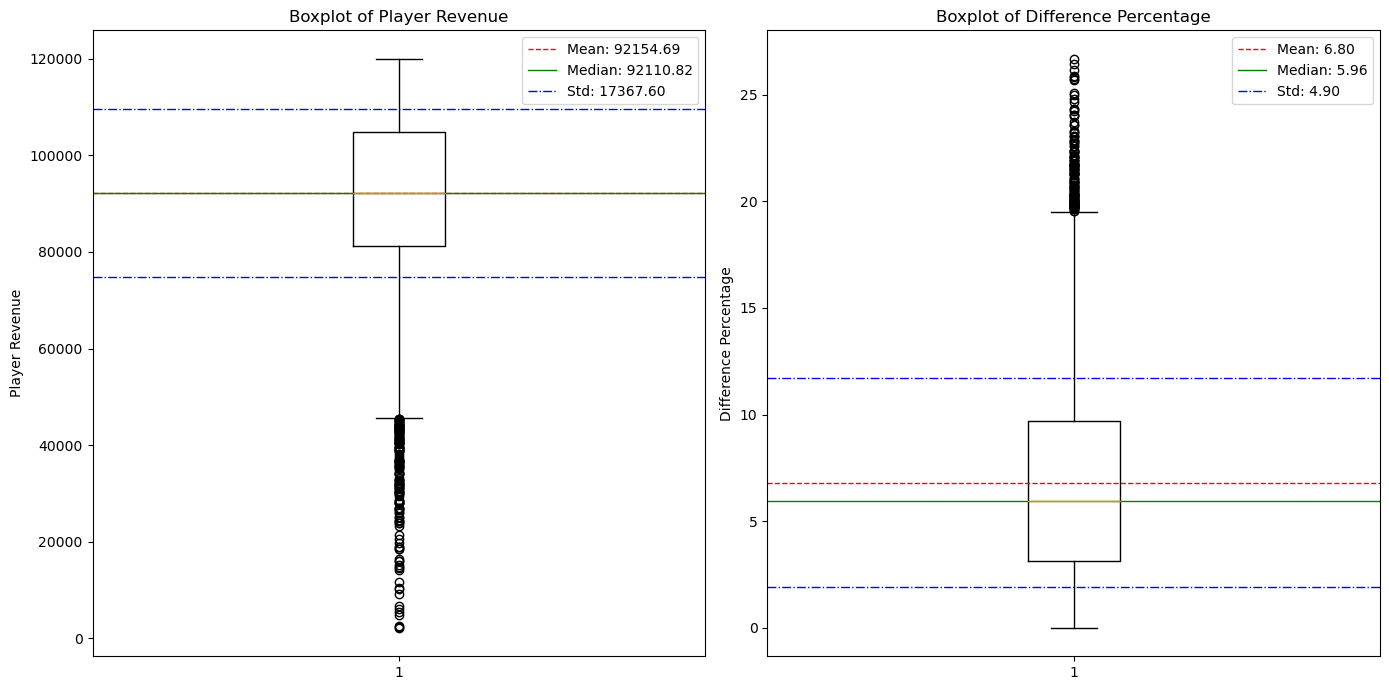

In [20]:
# Calculate mean, median, and std for 'Player Revenue'
mean_player_revenue = round(df_result['Player Revenue'].mean())
median_player_revenue = round(df_result['Player Revenue'].median())
std_player_revenue = round(df_result['Player Revenue'].std())

# Calculate mean, median, and std for 'Difference Percentage'
mean_diff_percentage = df_result['Difference Percentage'].mean()
median_diff_percentage = df_result['Difference Percentage'].median()
std_diff_percentage = df_result['Difference Percentage'].std()

In [21]:
# Print the calculated values
print(f"Player Revenue - Mean: {mean_player_revenue}, Median: {median_player_revenue}, Std: {std_player_revenue}")
print(f"Difference Percentage - Mean: {mean_diff_percentage}, Median: {median_diff_percentage}, Std: {std_diff_percentage}")

Player Revenue - Mean: 92154.69004405344, Median: 92110.81982218617, Std: 17367.60385488739
Difference Percentage - Mean: 6.798216882749118, Median: 5.957480213392996, Std: 4.903602138978712
